# Example 3.5: Gridworld -- Page 60 Sutton Barto Book 

This script implements the gridworld value function calculation.



In [1]:
import numpy as np


In [2]:
# Define discrete 2D states S,S'
GRID_WORLD = np.zeros((5,5))

# Discount Factor
GAMMA = 0.9

# Probability for choosing an action, equal for all actions
# For a NN policy this would be the probability of choosing an action 
P_SA = 0.25

GRID_WORLD


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [3]:
# Define Actions (A) --> North, South, East, West 

actions = [[-1,0], [1,0], [0,-1], [0,1]]


In [4]:
# Iterative process, so we will run it for 10 times
# If this was some other higher dimensional, or continuous space, this would require a lot more iterations
# This number can range in the millions 

loops = 10

for loop in range(loops):
    for i, row in enumerate(GRID_WORLD):
        
        for j, cell in enumerate(row):
            
            state_id = np.array((i,j))
            value = 0
            
            for action in actions:

                prime_state_id = state_id + action
                
                # Get reward for current with Basrent state action pair r(s,a)
                if (prime_state_id < 0).any() or (prime_state_id > 4).any():
                    reward_t = -1
                    prime_state_id = state_id
                                    
                elif (state_id == [0,1]).all():
                    reward_t = +10
                    prime_state_id = [4,1]

                elif (state_id == [0,3]).all():
                    reward_t = +5
                    prime_state_id = [2,3]

                else:
                    reward_t = 0
                    
                # Calculate value for state s base on bellman equation 
                value += (P_SA*(reward_t + GAMMA*GRID_WORLD[prime_state_id[0],prime_state_id[1]]))
                
            # Update cell value state v(s)
            GRID_WORLD[state_id[0],state_id[1]] = value


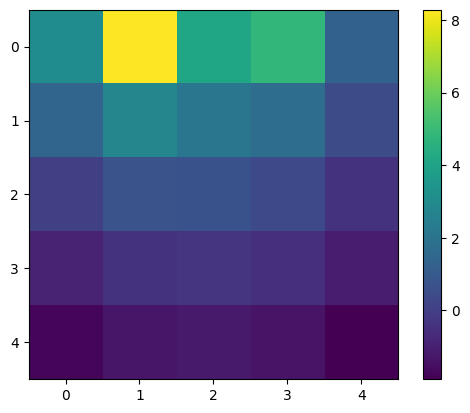

[[ 3.1  8.3  4.1  4.8  1.3]
 [ 1.4  2.8  2.1  1.7  0.4]
 [ 0.   0.7  0.6  0.3 -0.4]
 [-0.9 -0.4 -0.3 -0.5 -1.1]
 [-1.8 -1.3 -1.2 -1.4 -1.9]]


In [5]:
import matplotlib.pyplot as plt

plt.imshow(GRID_WORLD, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

print(np.round(GRID_WORLD,1))